## Tarea 6 (cambiando la amplitud y el número de muestras de una señal)

Para estos experimentos dejaremos fijo el tiempo de muestreo Tmuestreo=0.001. Haga una corrida del programa EjemTransfFourier.m donde TGrabación sea 1 seg y la amplitud de la señal muestreada (A1) sea 2 volts. La segunda corrida la hará duplicando el voltaje de la señal (A1=4) y manteniendo TGrabacion=1 . La tercera corrida regrese A1=2 pero ahora duplique el tiempo de grabación a TGrabacion=2 segundos.  La cuarta corrida es para TGrabacion=1, Tmuestreo=0.001 y A1=1.

Muestre las gráficas de señal y |FFT| de los cuatro casos. Registre la altura de los picos de la |FFT| de cada caso.

Enfóquese en la última corrida, la magnitud del módulo de la FFT debería ser 1 para la frecuencia de 1 Hz. Y como habrá visto la altura es 500 para cada frecuencia, +1 y -1 Hz. ¿Cómo hacemos para la frecuencia 1 tenga altura 1?, primero tentemos que constar a la pregunta ¿+1 o -1? recuerde que el significado del signo es simplemente un cambio de fase, por lo que las amplitudes deberían sumarse, sumando ambas amplitudes dará 1000, ¿de qué tamaño es el vector senal? 

Recuerde que la transformada de Fourier es una operación lineal, y debido a la propiedad de escalamiento deberíamos haber obtenido que la magnitud de una señal donde se duplicó la amplitud (A1=2) primera corrida. ¿cuanto vale la suma de las alturas de |FFT|? ¿y qué pasa para la segunda corrida? 

Ahora observemos la tercera corrida, vean que la amplitud de la señal es la misma que la de la corrida 1. ¿la suma de las alturas de las frecuencias +1 y -1 dan lo mismo? ahora vea el tamaño del vector senal en ambos casos.

¿identifica usted como se debe normailzar la FFTsenal para que la suma de las dos frecuencias +1 y -1 (que es una sola, insisto) den la amplitud A1?

Sí la encontró !Felicidades!, si no entonces trate lo siguiente, FFTsenal =FFTsenal/N, donde N es el tamaño del vector senal. ¿las sumas dan los valores esperados? Efectivamente, la FFT que entrega la función fft está multiplicada por N, así que hay que dividirla.

En resumen, para cuantificar la amplitud de la contribución de una armónica (recuerden que una armónica se refiere a múltiplos de la deltaf) debería duplicarse y dividirse entre N la amplitud del pico en la frecuencia positiva.

Haga una función llamada CalculaVerdaderaAmplitud que reciba la FFT de la señal y que regrese un vector de tamaño floor(N/2) donde (posición -1)*deltaf será la frecuencia a analizar y el valor guardado en esa posición sea |FFT| correcta para cada frecuencia. En el caso de la corrida 1 debería regresar un vector de tamaño 500 con todos los valores en 0 excepto en la posición 2 que tenga el valor de 2.

Finalmente ahora haga una nueva corrida elija Tmuestreo=0.001, TGrabacion=1, A1=2 pero la señal en vez de calcularla así:


senal=A1*cos(2*pi*frecSenal1*t);

Calculela así:

senal=A1*cos(2*pi*frecSenal1*t)+2;

Note que es la misma señal pero solo se agregó una constante con valor 2. Reporte cuánto vale la amplitud para la frecuencia 0, ¿es correcto este valor? Recuerde que la amplitud de la frecuencia 0 es el promedio de la señal, ¿coincide?

Habrá notado que el valor está duplicado, ¿por qué? en vfrec ¿existe una frecuencia +0 y otra -0? ahí esta la explicación. ¿cual es?

Corrija la función CalculaVerdaderaAmplitud para que la amplitud en la posición 1 del vector de regreso no esté duplicada como todas las demás.

Haga un reporte con las gráficas solicitadas y las respuestas a las preguntas, también envíe su función CalculaVerdaderaAmplitud.m



In [1]:
%matplotlib inline
from numpy.fft import fft,fftshift,ifftshift
from numpy import arange,cos,abs,angle,pi,floor
import matplotlib.pyplot as plt

## Parámetro para el muestreo de los datos en el dominio del tiempo

In [2]:
T_muestreo = 0.001 # Periodo de muestreo
t_grabacion = 1 # Tiempo total de grabacion de datos (segundos)
# Formamos un array que va desde 0 a t_grabacion-Tmuestreo con incrementos de T_muestreo
t = arange(0,t_grabacion,T_muestreo)

## Construyendo señal a analizar

Se tratará una señal cosenoidal de amplitud 1 y frecuencia 2 Hz

In [3]:
frecSenal = 1   # Queremos un coseno de 1 Hz de frecuencia
A = 2   # Queremos que el coseno sea de amplitud 1
w = 2*pi*frecSenal # Frecuencia angular
senal = A*cos(w*t) + 2    # Construimos la señal coseniodal de amplitud 1 y frecuencia 1 Hz 

## Graficando la señal original

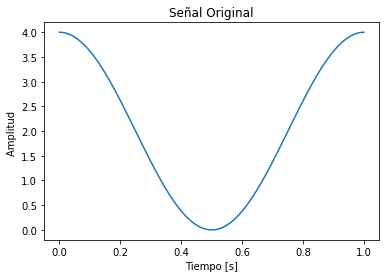

In [4]:
plt.plot(t,senal)
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.savefig("Senal_in_2A_1sG_001sT_2.png")

## Calculando la transformada de Fourier

In [7]:
fft_senal = fft(senal)

## Definición de función para correr la señal

#### Parámetros:
- datos: array de la señal original
- T_muestreo: Periodo de muestreo de los datos
#### Retorna:
- vfreq: un array con los elementos ordenados comenzando con los valores negativos pasando por 0 hasta los positivos para poder interpretar mejor la fft

In [8]:
def calcVecFrec(datos,PeriodoMuestreo):
    #Esta funcion calcula el vector de los valores de la frecuencia (en Hz) en el
    #espacio de Fourier de una secuencia guardada en el vector datos,
    #PeriodoMuest, es el tiempo transcurrido entre medición y medición
    N = len(datos) # Calculamos la longitud de los datos
    TiempoCompleto=PeriodoMuestreo*N #Calculamos el tiempo total (de medición) de la señal
    #Verificamos si la cantidad de datos es par o impar
    if(N%2 == 0):
        # Construímos un vector que va de -int(N/2) hasta int(N/2)-1 en incrementos de 1 en 1
        vfreq = arange(-floor(N/2),floor(N/2),1)
    else:
        # Construimos un vector que va de -int(N/2) hasta int(N/2) en incrementos de 1
        vfreq = arange(-floor(N/2),floor(N/2)+1,1)
    # Hasta este punto las unidades de vfreq serán (repeticiones)
    # Queremos convertirlas a Hz como en el caso de la fft, así que dividiremos
    # entre el tiempo completo de medicion
    vfreq /= TiempoCompleto # Aqui las unidades son Hertz
    # Corremos el arreglo de tal forma que quede identico a la parte del dominio de la gráfica de
    # la transformada de fourier

    # Lo que hace ifffshift es correr un arreglo hacia la izquierda por ejemplo:
    # si vfreq = [-2,-1,0,1,2] ---> [-1,0,1,2,-2] ---> [0,1,2,-2,-1]
    vfreq = ifftshift(vfreq) # Corremos el arreglo
    return vfreq

## Creamos un array con exactamente los mismos valores del dominio en la frecuencia de la transfromada de fourier

In [9]:
vfreq = calcVecFrec(datos=senal,PeriodoMuestreo=T_muestreo)

## Graficando la FFT 

Notese que estamos corriendo nuevaente la fft tanto en dominiio (vfreq) como en sus valores (abs(FFTsenal))

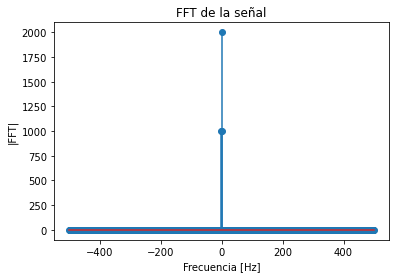

In [10]:

plt.stem(fftshift(vfreq),abs(fftshift(fft_senal)))
plt.title("FFT de la señal")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.savefig("FFT_senal_out_nn_2A_1sG_001sT_2.png")

## Aunque parece que solo hay un contribución, observe que...

## Normalizando la magnitud de la FFT

Dado que en la grafica de la FFT (magnitud) cuando sumamos todas las contribuciones, nos da el número total de datos multiplicado por la amplitud de la señal, es decir, podemos normalizar (para interpretar, necesitamos decir cuales son las unidades de FFT) a 1, dividiendo entre la suma de todos los valores del array, así, la suma de todas las contribuciones dara siempre 1.

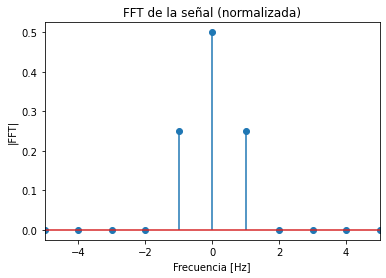

In [11]:
plt.stem(fftshift(vfreq),abs(fftshift(fft_senal))/sum(abs(fft_senal)))
plt.title("FFT de la señal (normalizada)")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.xlim([-5,5])
plt.savefig("FFT_senal_out_2A_1sG_001sT_2.png")

# Conclusiones

- En el primer experimento (Amplitud 2) se observa que al normalizar unicamente por el numero de datos, las contribuciones de cada frecuencia distinta de cero, están duplicadas con respecto al experimento base (Amplitud 1) que cuya suma de las contribuciones en el dominio de la frecuencia, es la unidad.
- En el segundo experimento (Amplitud 4) se observa lo mismo, la suma de las contribuciones de las frecuencias distintas de cero en el espacio de Fourier es igual a la longitud de los datos multiplicada por la amplitud de la señal de entrada
- En el tercer experimento (Amplitud 2, Tgrabacion 2s) se obtiene lo mismo que en el primer experimento, simplemente con mayor resolución.
- El cuarto experimento (Amplitud 1, Tgrabacion 1s) es el experimento base.

Para que la normalizacion sea lo más general posible, debemos, dividir entre la suma de todos los valores del array fft_senal recordemos que la suma de todas las contribuciones de ese array nos da la longitud del array escalada por la amplitud de la señal original.

Si la frecuencia 0, corresponde con el valor promedio de la señal el cual podemos calcular por medio de la integral:

$\frac{1}{1-0} \int^{1}_{0} (2cos(2 \pi t )+2) dt = 2$

Dado que el 0 es un único valor, es decir, no tiene contribuciones positivas o negativas como las demás frecuencias es evidente que su contribuciones sea el doble de las otras frecuencias, por lo que es necesario corregir este hecho a mano dentro de la función calcula verdadera amplitud.

In [12]:
print(len(senal), len(fft_senal))


1000 1000


In [21]:
#%load 'calculaVerdaderaAmplitud.py'
from calculaVerdaderaAmplitud import calculaVerdaderaAmplitud
v = calculaVerdaderaAmplitud(fft=fft_senal)

## Graficando arreglo obtenido

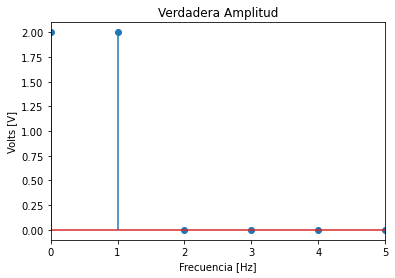

In [22]:
plt.stem(v)
plt.xlim([0,5])
plt.title("Verdadera Amplitud")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Volts [V]")
plt.savefig("verdadera_amplitud.png")

## Verificando la longitud

In [15]:
print(len(v))

500
